Amazon Books Reviews
Goodreads-books reviews and descriptions of each book


This dataset contains 2 files as you see in the figure above


The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.
and this file has these attributes

https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews

## CREACIÓN DE LA SESION DE SPARK

In [1]:
!pip install -q findspark
!pip install -q kagglehub
!pip install -q wordcloud

In [2]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder \
                    .master("local[*]") \
                    .config("spark.driver.memory", "23g") \
                    .appName("AmazonBooks") \
                    .getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

## CARGA DE DATOS

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedbakhet/amazon-books-reviews")

print("Path to dataset files:", path)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/mohamedbakhet/amazon-books-reviews/versions/1


### Reviews

In [4]:
reviews = spark.read.csv(path+"/Books_rating.csv",
                    header=True,
                    inferSchema=True,
                    sep=",",
                    quote='"',        # <- Maneja correctamente los textos entre comillas
                    escape='"'        # <- (opcional) Escapa comillas internas si las hubiera
                    )

### Books

In [5]:
books_df = spark.read.csv(path+"/books_data.csv",
                    header=True,
                    inferSchema=True,
                    sep=",",
                    quote='"',        # <- Maneja correctamente los textos entre comillas
                    escape='"'        # <- (opcional) Escapa comillas internas si las hubiera
                    )

## VISTA RAPIDA DE LOS DATASETS

### Reviews

In [6]:
reviews.show()

+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|        Id|               Title|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|
+----------+--------------------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+
|1882931173|Its Only Art If I...| NULL| AVCGYZL8FQQTD|Jim of Oz "jim-of...|               7/7|         4.0|  940636800|Nice collection o...|This is only for ...|
|0826414346|Dr. Seuss: Americ...| NULL|A30TK6U7DNS82R|       Kevin Killian|             10/10|         5.0| 1095724800|   Really Enjoyed It|I don't care much...|
|0826414346|Dr. Seuss: Americ...| NULL|A3UH4UZ4RSVO82|        John Granger|             10/11|         5.0| 1078790400|Essential for eve...|If people become ...|
|0826414346|Dr. Seuss: Ameri

In [7]:
reviews.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- User_id: string (nullable = true)
 |-- profileName: string (nullable = true)
 |-- review/helpfulness: string (nullable = true)
 |-- review/score: double (nullable = true)
 |-- review/time: integer (nullable = true)
 |-- review/summary: string (nullable = true)
 |-- review/text: string (nullable = true)



### Books

In [8]:
books_df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+
|               Title|         description|             authors|               image|         previewLink|           publisher|publishedDate|            infoLink|          categories|ratingsCount|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+--------------------+------------+
|Its Only Art If I...|                NULL|    ['Julie Strain']|http://books.goog...|http://books.goog...|                NULL|         1996|http://books.goog...|['Comics & Graphi...|        NULL|
|Dr. Seuss: Americ...|Philip Nel takes ...|      ['Philip Nel']|http://books.goog...|http://books.goog...|           A&C Black|   2005-01-01|http://books.goog...|['Biography & Aut...|        NULL|
|Wonderful Wors

In [9]:
books_df.printSchema()

root
 |-- Title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- image: string (nullable = true)
 |-- previewLink: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- publishedDate: string (nullable = true)
 |-- infoLink: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- ratingsCount: double (nullable = true)



## ESTADISTICAS DESCRIPTIVAS

### Reviews

In [10]:
reviews.count()

3000000

In [11]:
reviews.columns

['Id',
 'Title',
 'Price',
 'User_id',
 'profileName',
 'review/helpfulness',
 'review/score',
 'review/time',
 'review/summary',
 'review/text']

In [12]:
reviews.describe()

summary,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
count,3000000,2999792,481171,2438213,2438114,3000000,3000000,3000000,2999962,2999992
mean,1.0568515696607149E9,2012.796651763537,21.762655874939096,NULL,NaN,NULL,4.215289333333334,1.132306772630393E9,Infinity,17963.0
stddev,1.284488524833734E9,1536.7533549608797,26.206540521370137,NULL,NaN,NULL,1.203053747233401,1.493201875283067E8,NaN,47479.34448789284
min,0001047604,""" Film technique,...",1.0,A00109803PZJ91RLT...,,0/0,1.0,-1,!,The Tao of Muham...
max,B0064P287I,you can do anythi...,995.0,AZZZZW74AAX75,~~~~~~~,997/1090,5.0,1362355200,~~~~~~~~~~~~~~~~~...,~~~~~~~~~~~~~~~~~...


In [13]:
reviews.summary().show()

+-------+--------------------+--------------------+------------------+--------------------+-----------+------------------+-----------------+-------------------+--------------------+--------------------+
|summary|                  Id|               Title|             Price|             User_id|profileName|review/helpfulness|     review/score|        review/time|      review/summary|         review/text|
+-------+--------------------+--------------------+------------------+--------------------+-----------+------------------+-----------------+-------------------+--------------------+--------------------+
|  count|             3000000|             2999792|            481171|             2438213|    2438114|           3000000|          3000000|            3000000|             2999962|             2999992|
|   mean|1.0568515696607149E9|   2012.796651763537|21.762655874939096|                NULL|        NaN|              NULL|4.215289333333334|1.132306772630393E9|            Infinity|       

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'review/score'}>]], dtype=object)

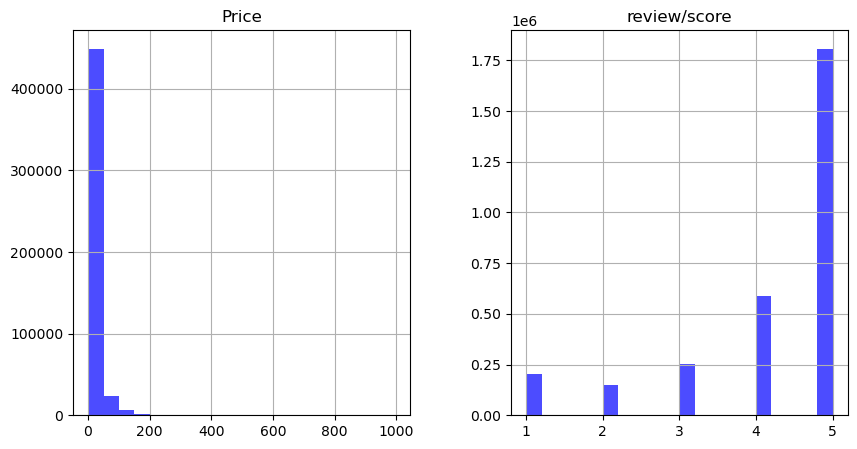

In [14]:
df_num = reviews.select('Price','review/score')
df_num.toPandas().hist(bins=20, figsize=(10, 5), color='blue', alpha=0.7)

### Books

In [15]:
books_df.count()

212404

In [16]:
books_df.columns

['Title',
 'description',
 'authors',
 'image',
 'previewLink',
 'publisher',
 'publishedDate',
 'infoLink',
 'categories',
 'ratingsCount']

In [17]:
books_df.describe()

summary,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
count,212403,143962,180991,160329,188568,136518,187099,188568,171205,49752
mean,3823.672941176471,1.4285714285714286,NULL,NULL,NULL,51495.0,1983.8165452207459,NULL,NULL,21.25297475478373
stddev,10717.999589636447,0.9759000729485332,NULL,NULL,NULL,NULL,32.538273342491706,NULL,NULL,201.34043063142792
min,""" Film technique,...",!! ALL NEW CAMPGR...,"[""'Abd al-Samih A...",http://books.goog...,http://books.goog...,"""O'Reilly Media, ...",101-01-01,http://books.goog...,"[""'Abd al-Bah̄a, ...",1.0
max,you can do anythi...,�Una novela llam�...,['편집부편'],http://books.goog...,http://books.goog...,펜립,20??,https://play.goog...,['Śaivism'],4895.0


In [18]:
print("Total reseñas:", reviews.count())
print("Total libros únicos:", books_df.select('Title').distinct().count())
print("Usuarios únicos:", reviews.select('User_id').distinct().count())
print("Autores únicos:", books_df.select('authors').distinct().count())

Total reseñas: 3000000
Total libros únicos: 212404
Usuarios únicos: 1008973
Autores únicos: 127279


## CALIDAD DE DATOS

### Reviews

In [19]:
from pyspark.sql.functions import col, sum
nulos = reviews.select([sum(col(c).isNull().cast("int")).alias(c) for c in reviews.columns])
nulos_lista = [(c, nulos.first()[c]) for c in nulos.columns]

In [20]:
from pyspark.sql.functions import col, sum

# Conteo de nulos
nulos_df = reviews.select([sum(col(c).isNull().cast("int")).alias(c) for c in reviews.columns])

# Lista transpuesta
nulos_lista = [(c, nulos_df.first()[c]) for c in nulos_df.columns]
nulos_transpuesto = spark.createDataFrame(nulos_lista, ["columna", "nulos"])

# Porcentaje de nulos
nulos_transpuesto = nulos_transpuesto.withColumn("porcentaje", (col("nulos")/reviews.count())*100)

nulos_transpuesto.show()

+------------------+-------+--------------------+
|           columna|  nulos|          porcentaje|
+------------------+-------+--------------------+
|                Id|      0|                 0.0|
|             Title|    208|0.006933333333333333|
|             Price|2518829|   83.96096666666666|
|           User_id| 561787|  18.726233333333333|
|       profileName| 561886|  18.729533333333332|
|review/helpfulness|      0|                 0.0|
|      review/score|      0|                 0.0|
|       review/time|      0|                 0.0|
|    review/summary|     38|0.001266666666666...|
|       review/text|      8|2.666666666666667E-4|
+------------------+-------+--------------------+



### Books

In [21]:
nulos_df = books_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in books_df.columns])
nulos_lista = [(c, nulos_df.first()[c]) for c in nulos_df.columns]

In [22]:
# Conteo de nulos
nulos_df = books_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in books_df.columns])

# Lista transpuesta
nulos_lista = [(c, nulos_df.first()[c]) for c in nulos_df.columns]
nulos_transpuesto = spark.createDataFrame(nulos_lista, ["columna", "nulos"])

# Porcentaje de nulos
nulos_transpuesto = nulos_transpuesto.withColumn("porcentaje", (col("nulos")/books_df.count())*100)

nulos_transpuesto.show()

+-------------+------+--------------------+
|      columna| nulos|          porcentaje|
+-------------+------+--------------------+
|        Title|     1|4.708009265362234E-4|
|  description| 68442|    32.2225570139922|
|      authors| 31413|  14.789269505282387|
|        image| 52075|  24.516958249373836|
|  previewLink| 23836|  11.222010884917422|
|    publisher| 75886|   35.72719911112785|
|publishedDate| 25305|  11.913617445999133|
|     infoLink| 23836|  11.222010884917422|
|   categories| 41199|  19.396527372365867|
| ratingsCount|162652|   76.57671230296981|
+-------------+------+--------------------+



## UNION DE TABLAS

In [23]:
#Union
full_data = reviews.join(books_df, on='Title', how='left')
full_data.show(5)

+--------------------+----------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+---------+-------------+--------------------+--------------------+------------+
|               Title|        Id|Price|       User_id|         profileName|review/helpfulness|review/score|review/time|      review/summary|         review/text|         description|       authors|               image|         previewLink|publisher|publishedDate|            infoLink|          categories|ratingsCount|
+--------------------+----------+-----+--------------+--------------------+------------------+------------+-----------+--------------------+--------------------+--------------------+--------------+--------------------+--------------------+---------+-------------+--------------------+--------------------+------------+
|Dr. Seuss: Americ...|0826414346| NULL|A30T

## ANALISIS EXPLORATORIO ADICIONAL

### Distribucion de Calificacion por Categorias Top

<Figure size 640x480 with 0 Axes>

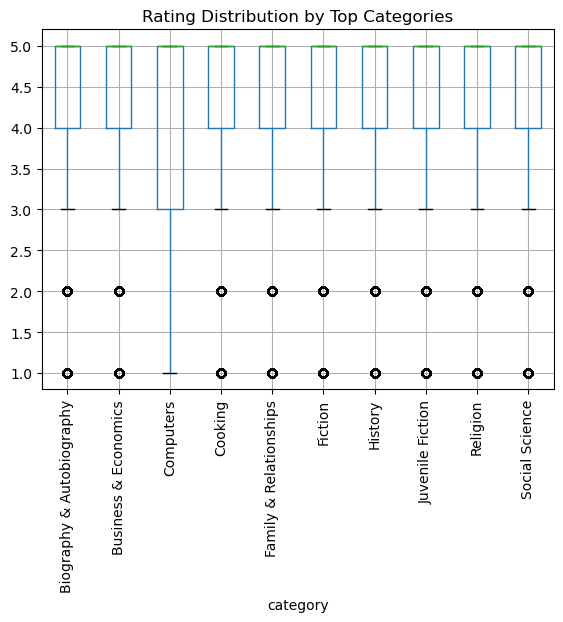

In [24]:
from pyspark.sql.functions import split, regexp_replace, col, explode

# Limpiar categorías y separarlas en lista
full_data = full_data.withColumn(
    "categories_array",
    split(
        regexp_replace(
            regexp_replace(col("categories"), r"^\[|\]$", ""),  # quitar corchetes
            "'", ""
        ),
        ", "
    )
)

cat_df = full_data.select("review/score", explode("categories_array").alias("category"))

top_cats = cat_df.groupBy("category").count().orderBy("count", ascending=False).limit(10)
fav_cats = [r.category for r in top_cats.collect()]

box_df = cat_df.filter(col("category").isin(fav_cats)).toPandas()

# Plot
import matplotlib.pyplot as plt
plt.figure()
box_df.boxplot(column="review/score", by="category", rot=90)
plt.title("Rating Distribution by Top Categories")
plt.suptitle("")
plt.show()

### Tamaño de la descripcion vs Rating

In [25]:
from pyspark.sql.functions import length, avg
full_data.withColumn("desc_len", length("description")) \
         .groupBy("review/score") \
         .agg(avg("desc_len").alias("avg_desc_len")) \
         .orderBy("review/score") \
         .show()

+------------+-----------------+
|review/score|     avg_desc_len|
+------------+-----------------+
|         1.0|786.3451511204244|
|         2.0|771.2152334683759|
|         3.0|748.2009096134143|
|         4.0|730.8037269813063|
|         5.0|704.4092604631005|
+------------+-----------------+



### Heatmap de valores nulos

<Axes: >

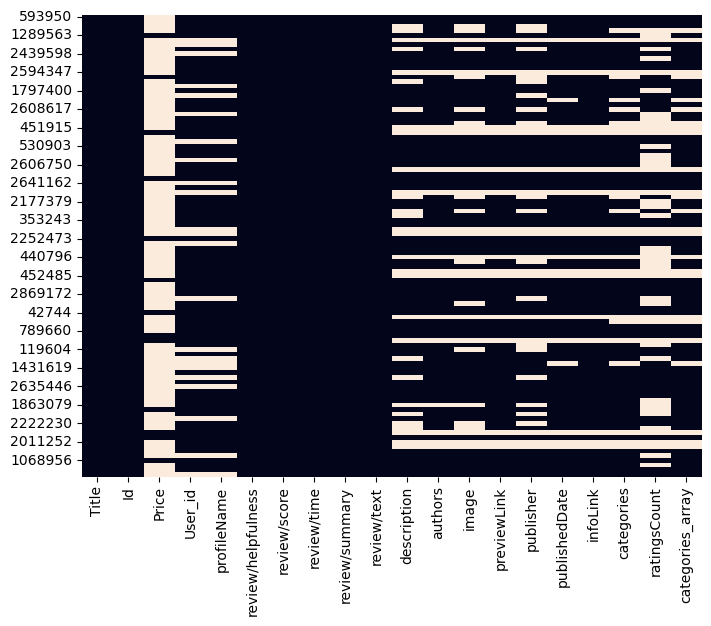

In [26]:
import seaborn as sns
nulls = full_data.select([ (col(c).isNull().cast("int")).alias(c) for c in full_data.columns ]) \
                 .toPandas()
plt.figure(figsize=(8,6))
sns.heatmap(nulls.sample(100), cbar=False)  # muestreo para no sobrecargar

### WordCloud

(-0.5, 799.5, 399.5, -0.5)

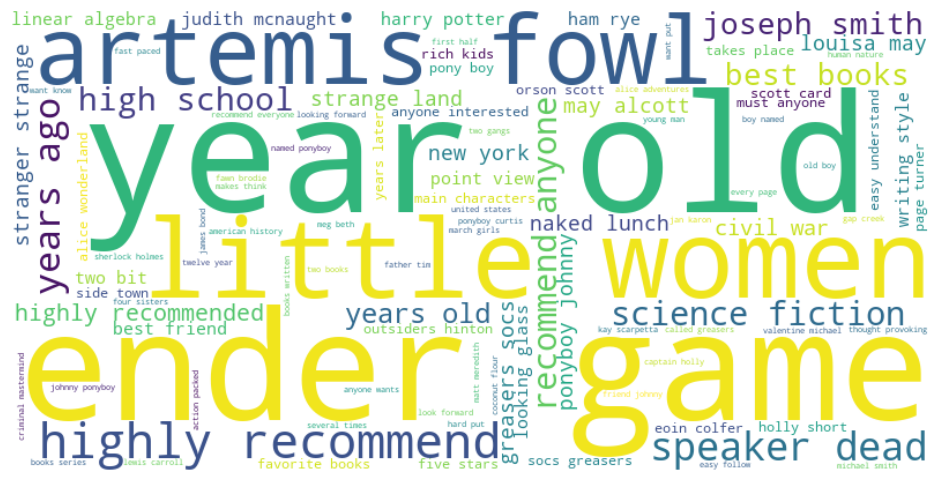

In [27]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from pyspark.sql.functions import col

# 1. Carga un sample de reseñas 5★
texts_pd = (
    full_data
    .filter((col("review/score") == 5.0) & col("review/text").isNotNull())
    .select("review/text")
    .limit(10000)
    .toPandas()
)

# 2. Limpieza de texto
def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-záéíóúñ ]", " ", text)
    return " ".join(w for w in text.split() if len(w) > 2)

texts_pd["clean"] = texts_pd["review/text"].map(clean)

# 3. Definir stopwords extra
extra_stop = {
    "book","just","read","one","like","really","even","would","could",
    "also","much","well","get","make","things","story","character",
    "chapter","reading","time","people","good","great","world","love",
    "life","will","many","still","quote", "quot",'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'
}
stop_list = list(STOPWORDS.union(extra_stop))

# 4. Vectorizar bigrams y contar
docs = texts_pd["clean"].tolist()
cv = CountVectorizer(ngram_range=(2,2), stop_words=stop_list, min_df=5, max_df=0.5)
X = cv.fit_transform(docs)
freqs = dict(zip(cv.get_feature_names_out(), X.sum(axis=0).A1))

# 5. Generar y mostrar WordCloud
wc = WordCloud(width=800, height=400, background_color="white", max_words=100)
wc = wc.generate_from_frequencies(freqs)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
